# Question 1: Guess the coin 

Assume we are playing a guessing game with a friend. The friend has three coins at hand:
* **Coin A**: a fair coin with equal probability of being head (H ) or tail (T)
* **Coin B**: a biased coin with a probability of 0.75 being head (H)
* **Coin C**: a coin with a probability of $P^*(H)$ being head (H)

The friend secretly picked one of the coins, randomly flipped it a few times, and get a sequence of *HTHHTT* (all of which come from the same coin he picked). 

1. If you had to choose between whether **Coin A** or **Coin B** was used, and you prefer the one which is more likely, which one will you choose?  (5 points)
2. What would be the value of  $P^*(H)$ such that **Coin C** corresponds to the most likely (among infinite possible coins) coin to have produced the observed sequence?(i.e. provide  an analytical derivation for $P^*(H)$ using maximum likelihood estimation (MLE))."

## Answer

1. In short, Coin A is more likely to produced the sequence than Coin B. The situation of a coin flip can be represented by a binomial distribution. For Coin A, this distribution has P(H)=.5 and Coin B has P(H)=.75. Our goal is to determine which distribution maximizes the probability of producing the observed sequence by utilizing Maximum Likelihood Estimation.

    Distribution A's probability of producing the observed sequence is .5(the probability of either outcome)^6(the number of trials)=.015625. For Distribution B, the probability .75(probability of heads)^3(number of heads)*.25(probability of tails)^3(number of tails)=.00659. Clearly, the probability is significantly higher for A than B so it is much more likely to have produced the outcome.


2. To determine the maximizing probability from the infinite possible coins with infinite P(H) we can reverse engineer this process. The probability is P(H)^3*1-P(H) and the first-order condition must be set to 0 to maximize. 

\\[-3*(1-P(H))^2 *P(H)^3+(1-P(H))^3*3*P(H)^2=0.\\] This solves to P(H)=.5 which is the P(H) of Coin A.

# Question 2: Multiple Linear Regression 

This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be developed using machine friendly data and the weight of fish can be predicted. Use the following code to import the Fish market prices dataset in python. The dataset is taken from https://www.kaggle.com/aungpyaeap/fish-market.

In [1]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None


df = pd.read_csv("data.csv", index_col=0)
df = df[~df.isin([0, np.nan, np.inf, -np.inf]).any(1)]
df.head()

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Here,
1. Species: Species name of fish
2. Weight: Weight of fish in gram
3. Length1: Vertical length in cm
4. Length2: Diagonal length in cm
5. Length3: Cross length in cm
6. Height: Height in cm
7. Width: Diagonal width in cm

In [2]:
df = df.fillna(0)
X = df.drop(['Weight'], axis=1)
y = df['Weight']

Consider the `Weight` column to be your target variable.

a. (2 pts)  Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

b. (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE). Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c. (6 pts) Split the data into a training set and a test set, using the train_test_split with test_size = 0.25 and random_state = 50. Fit an MLR using the training set. Evaluate the trained model using the training set and the test set, respectively. Compare the two MAE values thus obtained. Report the [$R^2$ (coefficient of determination)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) value.

d. (5 pts) Calculate the pearson correlation matrix of the independent variables in the training set. Report the variables which have magnitude of correlation greater than 0.8 w.r.t the variable 'Length2'. Now, plot a pairplot based on Species column as seen in the 2nd plot [here](https://seaborn.pydata.org/generated/seaborn.pairplot.html). How does the pairplot validate your previous answer?

e. (6 pts) Plot the histogram of Y_train and see its distribution. Now take log of Y_train and plot its histogram. Now run regression again after taking log and compare the MAE. You need to do np.exp(predictions) to bring them back to original scale, and then calculate MAE and $R^2$. Explain the results.

f. (5 pts) Rank the features in descending order based on their significance. You might find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html.

g. (Bonus question - 5 pts) Use the Species column for one-hot encoding and perform part c of this question. Explain your results.

## Answer

a.

In [3]:
print(df.shape)
df.head()

(158, 6)


,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


b.

In [4]:
#fitting linear model
from sklearn import linear_model
reg = linear_model.LinearRegression()
X = df.drop(['Weight'],axis=1)
y = df['Weight']
reg.fit(X, y)
input_list = ['Length1','Length2','Length3','Height','Width']

print('Regression coefficients:')
for i in range(len(input_list)):
    print(input_list[i] + ': ' + str(reg.coef_[i]))

#MAE calculation
from sklearn.metrics import mean_absolute_error
y_pred = reg.predict(X)
mae = mean_absolute_error(y,y_pred)
print('\nMean absolute error:',str(mae))

Regression coefficients:
Length1: 63.96945622373368
Length2: -9.108513063654959
Length3: -28.11886474424317
Height: 27.926207595439898
Width: 23.412319762427106

Mean absolute error: 91.71233364960413


c.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

reg2 = linear_model.LinearRegression()
reg2.fit(X_train, y_train)

y_pred_train = reg2.predict(X_train)
y_pred_test = reg2.predict(X_test)
mae_train = mean_absolute_error(y_train,y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print('Train mean absolute error:',str(mae_train))
print('Test mean absolute error:',str(mae_test))

from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
print('\nTrain R2:',str(r2_train))
print('Test R2:',str(r2_test))

Train mean absolute error: 86.08384309504522
Test mean absolute error: 97.81799831813106

Train R2: 0.8749867938140783
Test R2: 0.8990516531635936


d.

In [6]:
cor_mat = X_train.corr()
print(cor_mat)

          Length1   Length2   Length3    Height     Width
Length1  1.000000  0.999415  0.990696  0.594366  0.843893
Length2  0.999415  1.000000  0.993202  0.612155  0.851321
Length3  0.990696  0.993202  1.000000  0.681548  0.857178
Height   0.594366  0.612155  0.681548  1.000000  0.775991
Width    0.843893  0.851321  0.857178  0.775991  1.000000


Length1, Length3, and Width all have correlations greater than 0.8 with respect to Length2

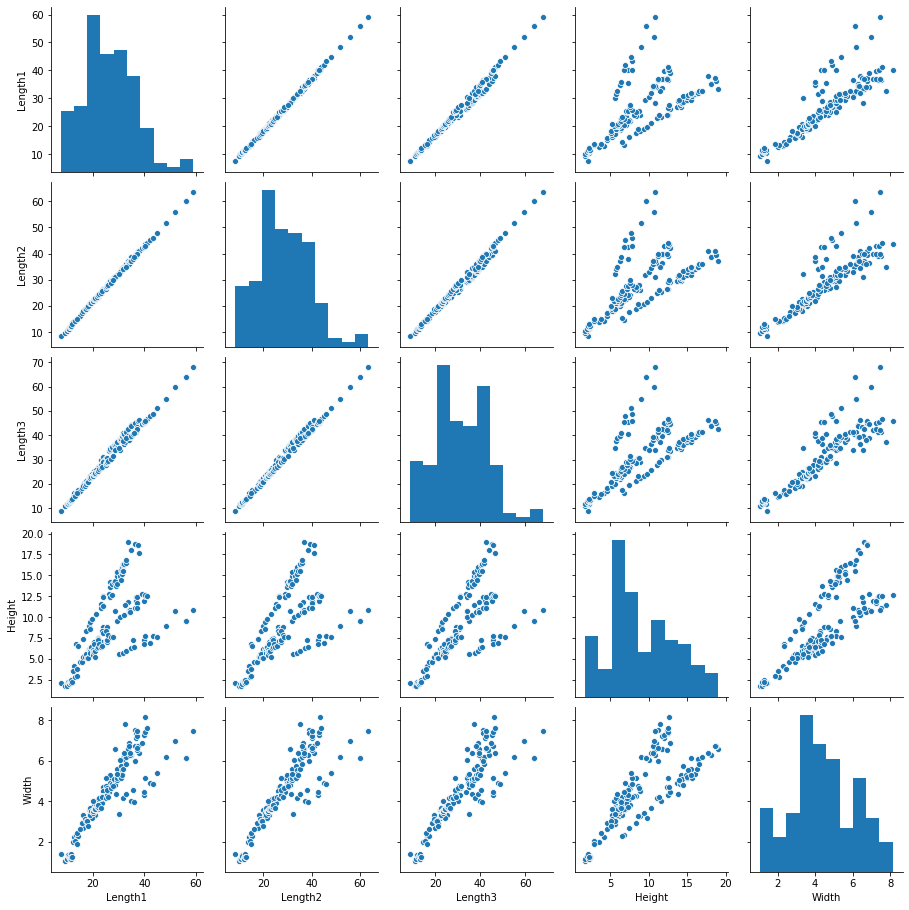

In [7]:
import seaborn as sns
sns.pairplot(X)

For Length2: Length1, Length3, and Width have pairplots that are close to linear which represents very strong correlations.

e. (6 pts) Plot the histogram of Y_train and see its distribution. Now take log of Y_train and plot its histogram. Now run regression again after taking log and compare the MAE. You need to do np.exp(predictions) to bring them back to original scale, and then calculate MAE and  𝑅2 . Explain the results.

(array([46., 23., 14., 15.,  7.,  9.,  2.,  0.,  2.]),
 array([   5.9       ,  183.02222222,  360.14444444,  537.26666667,
         714.38888889,  891.51111111, 1068.63333333, 1245.75555556,
        1422.87777778, 1600.        ]),
 <a list of 9 Patch objects>)

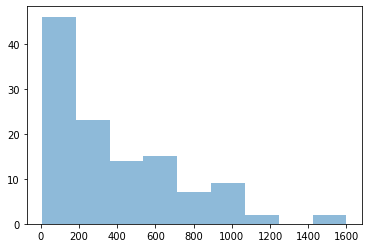

In [8]:
#Y_train histogram
import matplotlib.pyplot as plt
plt.hist(y_train, bins='auto', alpha=0.5)

(array([ 6.,  2.,  1.,  2.,  8., 25., 16., 23., 23., 12.]),
 array([1.77495235, 2.33523301, 2.89551366, 3.45579432, 4.01607497,
        4.57635563, 5.13663629, 5.69691694, 6.2571976 , 6.81747825,
        7.37775891]),
 <a list of 10 Patch objects>)

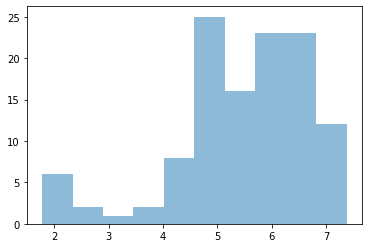

In [9]:
#log(Y_train)
log_train_y = np.log(y_train)
plt.hist(log_train_y, bins="auto", alpha=0.5)

In [10]:
#Bring back to scale and calculate MAE
model = linear_model.LinearRegression()
result = model.fit(X_train, log_train_y)  

y_train_pred = model.predict(X_train)
y_train_pred_exp = np.exp(y_train_pred)
#y_train_pred = np.exp(model.predict(X_train))

print('Mean absolute error:', mean_absolute_error(y_train, y_train_pred_exp))
print('R2:',r2_score(y_train,y_train_pred_exp))

Mean absolute error: 95.58357335390232
R2: 0.6973650153179172


The mean absolute error is slightly higher and the r2 score is significantly lower than the original. This is because tests performed on log-transformed data are often not relevant to the original data.
While log transformed data is good at reducing the effect of outliers, it fits data to a new form that does not represent the original distribution.

f. (5 pts) Rank the features in descending order based on their significance. You might find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html.

In [11]:
from sklearn.feature_selection import RFE
selector = RFE(model)
selector = selector.fit(X_train, log_train_y)
selector.ranking_

array([1, 1, 3, 4, 2])

Based off of the ranking array above, the features in descending order based on their significance are as follows:

1. Length1 and Length2 (tie)
2. Width
3. Length3
4. Height

g. (Bonus question - 5 pts) Use the Species column for one-hot encoding and perform part c of this question. Explain your results.

In [12]:
species=pd.get_dummies(X.index)
species
df2=df.reset_index(drop=True)
df2
df3=pd.concat([df2,species],axis=1)
df3
new_X=df3.drop(['Weight'], axis=1)
new_X

X_train2, X_test2, y_train2, y_test2 = train_test_split(new_X, y, test_size=0.25, random_state=50)
reg_g = linear_model.LinearRegression()
reg_g.fit(X_train2, y_train2)
y_pred_train = reg_g.predict(X_train2)
y_pred_test = reg_g.predict(X_test2)
mae_train = mean_absolute_error(y_train2,y_pred_train)
mae_test = mean_absolute_error(y_test2, y_pred_test)
print('Train mean absolute error:',str(mae_train))
print('Test mean absolute error:',str(mae_test))
from sklearn.metrics import r2_score
r2_train = r2_score(y_train2, y_pred_train)
r2_test = r2_score(y_test2,y_pred_test)
print('\nTrain R2:',str(r2_train))
print('Test R2:',str(r2_test))

Train mean absolute error: 63.15937130081539
Test mean absolute error: 72.60591304329992

Train R2: 0.9292624473278825
Test R2: 0.944471089248066


The train and test absolute errors are substantially lower and the R2 scores substantially higher than before one-hot encoding. This is likely because the Species column contains additional information for Weight that was not captured in the previous models.

# Question 3 

Using the same data from the previous question, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Use the same train and test data with additional augmented columns from before. Scale the data so that each of the independent variables have zero mean and unit variance. You can use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this.

    from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

5) Why did we have to scale the data before regularization? (5pts)

## Answer

1.

In [13]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.model_selection import KFold
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [14]:
#K fold CV Lasso
alphas =  10**np.linspace(10,-2,100)*0.5
kf = KFold(n_splits=5)
MAE_cv = pd.DataFrame(columns = alphas)

# Loop for 5 cross validations
for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = np.array(X_train)[train_index], np.array(X_train)[test_index]
    y_train, y_test = np.array(log_train_y)[train_index], np.array(log_train_y)[test_index]
    MAE = []
    # Loop for all the alphas (lambda)
    for i in range(len(alphas)):
        reg = linear_model.Lasso(alpha = alphas[i])
        reg.fit(X_train_cv,y_train)
        prediction = np.exp(reg.predict(X_test_cv))
        MAE.append(mean_absolute_error(np.exp(y_test),prediction))
    MAE_cv.loc[len(MAE_cv)] = MAE

Best lambda based on min average MAE from Lasso Regression is : 0.0466301673441609


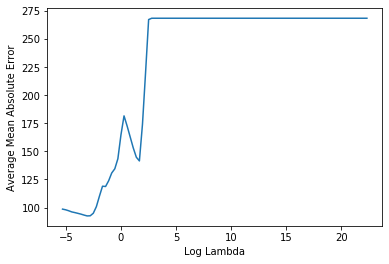

In [15]:
lambda_min_lasso=MAE_cv.mean(axis=0).idxmin()
plt.plot(np.log(alphas),MAE_cv.mean(axis =0).values)
plt.xlabel('Log Lambda')
plt.ylabel('Average Mean Absolute Error')

print ('Best lambda based on min average MAE from Lasso Regression is :', lambda_min_lasso)

Best lambda based on min average MAE from Ridge Regression is : 21.643806405415308


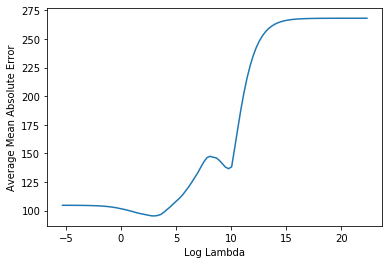

In [16]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
# Setting the rang for alpha and # of k folds required
alphas =  10**np.linspace(10,-2,100)*0.5
kf = KFold(n_splits=5)
MAE_cv = pd.DataFrame(columns = alphas)
# Loop for 5 cross validations
for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = np.array(X_train)[train_index], np.array(X_train)[test_index]
    y_train, y_test = np.array(log_train_y)[train_index], np.array(log_train_y)[test_index]
    MAE = []
    # Loop for all the alphas (lambda)
    for i in range(len(alphas)):
        reg = linear_model.Ridge(alpha = alphas[i])
        reg.fit(X_train_cv,y_train)
        prediction = np.exp(reg.predict(X_test_cv))
        MAE.append(mean_absolute_error(np.exp(y_test),prediction))
    MAE_cv.loc[len(MAE_cv)] = MAE
# Calculating the minimum lambda based on the average MAE 
lambda_min_ridge = MAE_cv.mean(axis =0).idxmin()
# Plotting Avergae MAE against lambda
plt.plot(np.log(alphas),MAE_cv.mean(axis =0).values)
plt.xlabel('Log Lambda')
plt.ylabel('Average Mean Absolute Error')
print ('Best lambda based on min average MAE from Ridge Regression is :', lambda_min_ridge)

2.

In [17]:
alphas =  10**np.linspace(10,-2,100)*0.5
coefs = []
for i in range(len(alphas)):
        reg_lasso = linear_model.Lasso(alpha = alphas[i])
        reg_lasso.fit(X_train,log_train_y)
        prediction = np.exp(reg_lasso.predict(X_test))
        coefs.append(reg_lasso.coef_)

Text(0.5, 1.0, 'Lasso coefficients as a function of regularization')

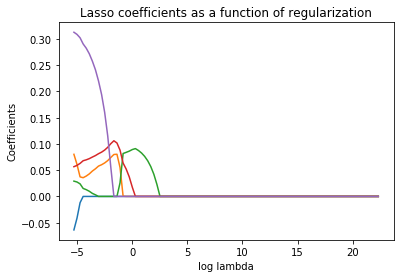

In [18]:
ax = plt.gca()
ax.plot(np.log(alphas), coefs)
#ax.set_xscale('log')
plt.xlabel('log lambda')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of regularization')

In [19]:
alphas =  10**np.linspace(10,-2,100)*0.5
coefs = []
for i in range(len(alphas)):
        reg_ridge = linear_model.Ridge(alpha = alphas[i])
        reg_ridge.fit(X_train,log_train_y)
        prediction = np.exp(reg_ridge.predict(X_test))
        coefs.append(reg_ridge.coef_)
        
# Plot ridge coefficients asa function of lambda


Text(0.5, 1.0, 'Ridge coefficients as a function of regularization')

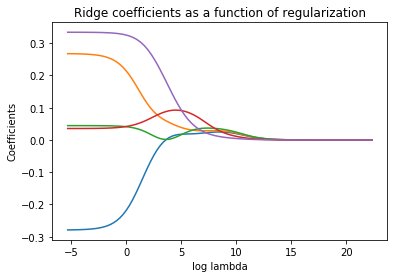

In [20]:
rx = plt.gca()
rx.plot(np.log(alphas), coefs)
#ax.set_xscale('log')
plt.xlabel('log lambda')
plt.ylabel('Coefficients')
plt.title('Ridge coefficients as a function of regularization')

For both ridge and lasso regression, as lambda increases, the coefficients all converge to zero and remain this way. Lasso regression also converges much sooner at around 0 as opposed to ridge regression at around 5.

3.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

# Least Squares Regression
reg = linear_model.LinearRegression()
reg.fit (X_train, log_train_y)
prediction_test = np.exp(reg.predict(X_test))
MAE_test = mean_absolute_error(y_test,prediction_test)

# Lasso Regression
reg_lasso = linear_model.Lasso(alpha = lambda_min_lasso)
reg_lasso.fit(X_train,log_train_y)
prediction_lasso = np.exp(reg_lasso.predict(X_test))
MAE_test_lasso = mean_absolute_error(y_test,prediction_lasso)

# Ridge Regression
reg_ridge = linear_model.Ridge(alpha = lambda_min_ridge)
reg_ridge.fit(X_train,log_train_y)
prediction_ridge = np.exp(reg_ridge.predict(X_test))
MAE_test_ridge = mean_absolute_error(y_test,prediction_ridge)

print('MAE for least square regression is:', MAE_test)
print('MAE for lasso regression is:', MAE_test_lasso)
print('MAE for ridge regression is:', MAE_test_ridge)

MAE for least square regression is: 177.96160694578688
MAE for lasso regression is: 154.4247113045898
MAE for ridge regression is: 156.80432830637122


4.  Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

In [22]:
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(X_train, log_train_y)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [23]:
mse = []
for i in range(len(lasso_cv.mse_path_)):
    avg_mse = lasso_cv.mse_path_[i].mean()
    mse.append(avg_mse)
    
# Calculate the lambda which minimizes mean squared error
min_lambda_lasso_cv = lasso_cv.alphas_[mse.index(min(mse))]

# Run the lasso regression on the minimum lambda
reg_lasso = linear_model.Lasso(alpha = min_lambda_lasso_cv)
reg_lasso.fit(X_train,log_train_y)

# Calculate the coefficients for all the variables
reg_lasso.coef_

print('best lambda based on cross validation:',str(min_lambda_lasso_cv))

best lambda based on cross validation: 0.012063246421159047


5. Why did we have to scale the data before regularization? (5pts)

## Answer
Scaling the data before regularization ensures that the regularization term lambda affects the coefficients involved in a similar way. If we did not scale the data beforehand, the lambda would penalize variables differently based on their magnitude. For example, height measured in meters will be penalized differently than height measured in centimeters. 

# Question 4

Lasso and ridge regularization techniques are often used to combat overfitting during linear regression. Which of the two yields more sparse models (i.e. fewer number of parameters) when the tuning parameter $\lambda$ is sufficiently large (but not infinite)?

## Answer

Lasso regression yields more sparse models. This is because with a large enough tuning parameter, lasso regression can set values to zero if they are not relevant. Ridge regression can penalize parameters through regularization, but not set them to zero.